Explore Dry Beans Classification using models which will help us to recognize the type of beans.

Dataset Link : https://drive.google.com/drive/folders/11caqwnxX107ieNCke0Xi9ur152n04p3L?usp=share_link


What Kind Of Approach You Could Follow for your Problem Statements :

Reading the Data, Understanding the Data, Exploratory Data Analysis, Splitting the Data, Training and Testing, Modeling, Accuracy

Hints provided are only for your references or getting started. You’re free to use your own methodology to work on your assignments.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Dry_Bean_Dataset.csv')
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610291.00,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638018.00,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.11,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645884.00,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620134.00,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
data.shape

(13611, 17)

In [4]:
# cheak is null
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [5]:
# cheak duplictaes
data.duplicated().sum()

68

In [6]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float64(1

In [8]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [9]:
print('Class :',data.Class.unique())

Class : ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


In [10]:
data.head(2)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610291.0,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638018.0,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER


In [11]:
data.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

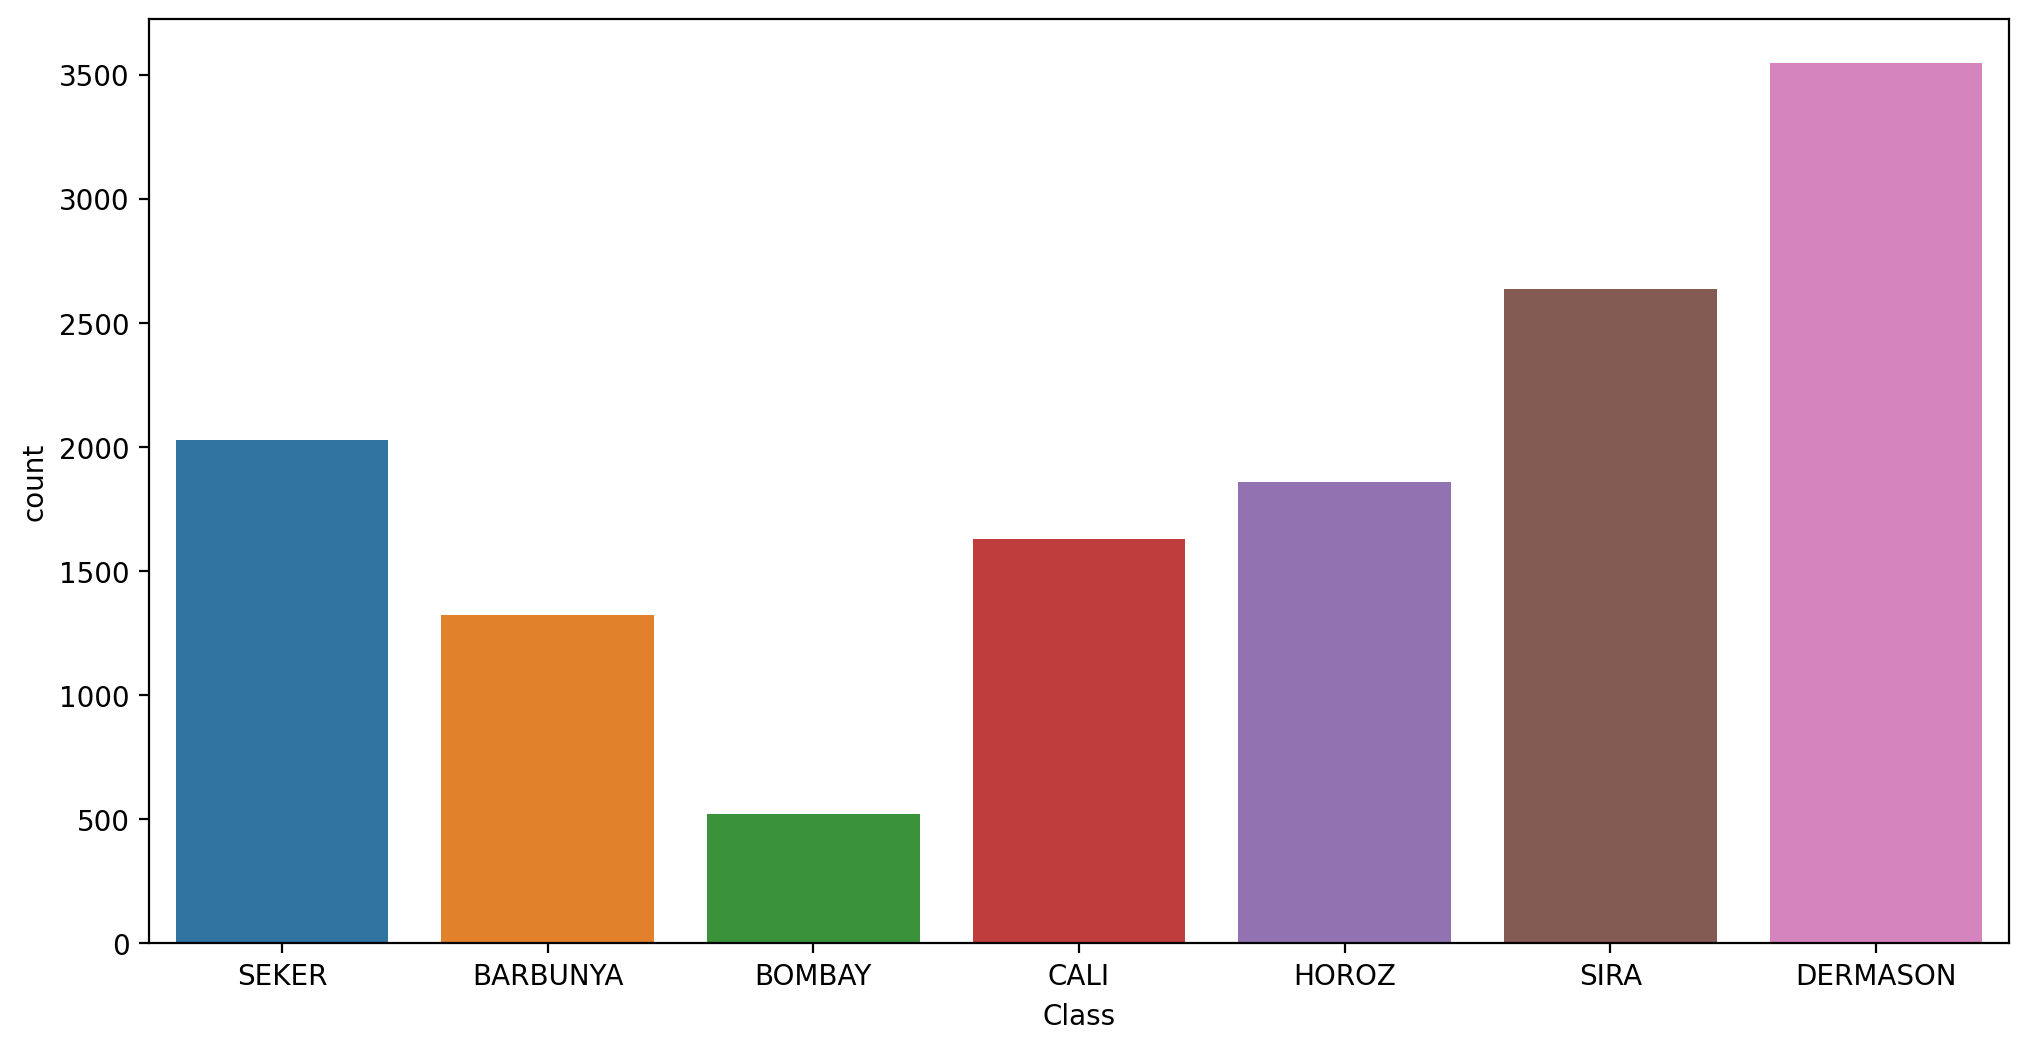

In [12]:
plt.figure(figsize = (12,6),dpi = 200)
sns.countplot(x= 'Class', data =data)

In [13]:
data.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.578189,0.932623,0.952041,0.243698,0.268580,0.999940,0.984998,0.054648,-0.197333,-0.359068,-0.269797,-0.848390,-0.641208,-0.273754,-0.358019
Perimeter,0.578189,1.000000,0.580571,0.548188,0.222027,0.224075,0.578783,0.591178,-0.017446,-0.180318,-0.318691,-0.234306,-0.516942,-0.450797,-0.235030,-0.260243
MajorAxisLength,0.932623,0.580571,1.000000,0.828360,0.550075,0.541011,0.933392,0.962271,-0.077287,-0.284857,-0.595710,-0.567902,-0.775840,-0.859401,-0.567607,-0.484464
MinorAxisLength,0.952041,0.548188,0.828360,1.000000,-0.005354,0.022391,0.951780,0.949214,0.145906,-0.156819,-0.214090,-0.018618,-0.947194,-0.475326,-0.022744,-0.266402
AspectRation,0.243698,0.222027,0.550075,-0.005354,1.000000,0.924185,0.245267,0.305237,-0.371234,-0.269110,-0.764975,-0.987644,0.020875,-0.837338,-0.978528,-0.451598
Eccentricity,0.268580,0.224075,0.541011,0.022391,0.924185,1.000000,0.270350,0.319360,-0.319678,-0.298282,-0.720138,-0.970308,0.017266,-0.859246,-0.981058,-0.450611
ConvexArea,0.999940,0.578783,0.933392,0.951780,0.245267,0.270350,1.000000,0.985255,0.052864,-0.206901,-0.363620,-0.271651,-0.848382,-0.642773,-0.275631,-0.364302
EquivDiameter,0.984998,0.591178,0.962271,0.949214,0.305237,0.319360,0.985255,1.000000,0.028762,-0.232344,-0.437189,-0.328980,-0.893403,-0.714693,-0.331594,-0.394693
Extent,0.054648,-0.017446,-0.077287,0.145906,-0.371234,-0.319678,0.052864,0.028762,1.000000,0.192268,0.344510,0.354912,-0.141525,0.237584,0.348226,0.148622
Solidity,-0.197333,-0.180318,-0.284857,-0.156819,-0.269110,-0.298282,-0.206901,-0.232344,0.192268,1.000000,0.609668,0.304802,0.154346,0.344337,0.308614,0.700150


<Axes: >

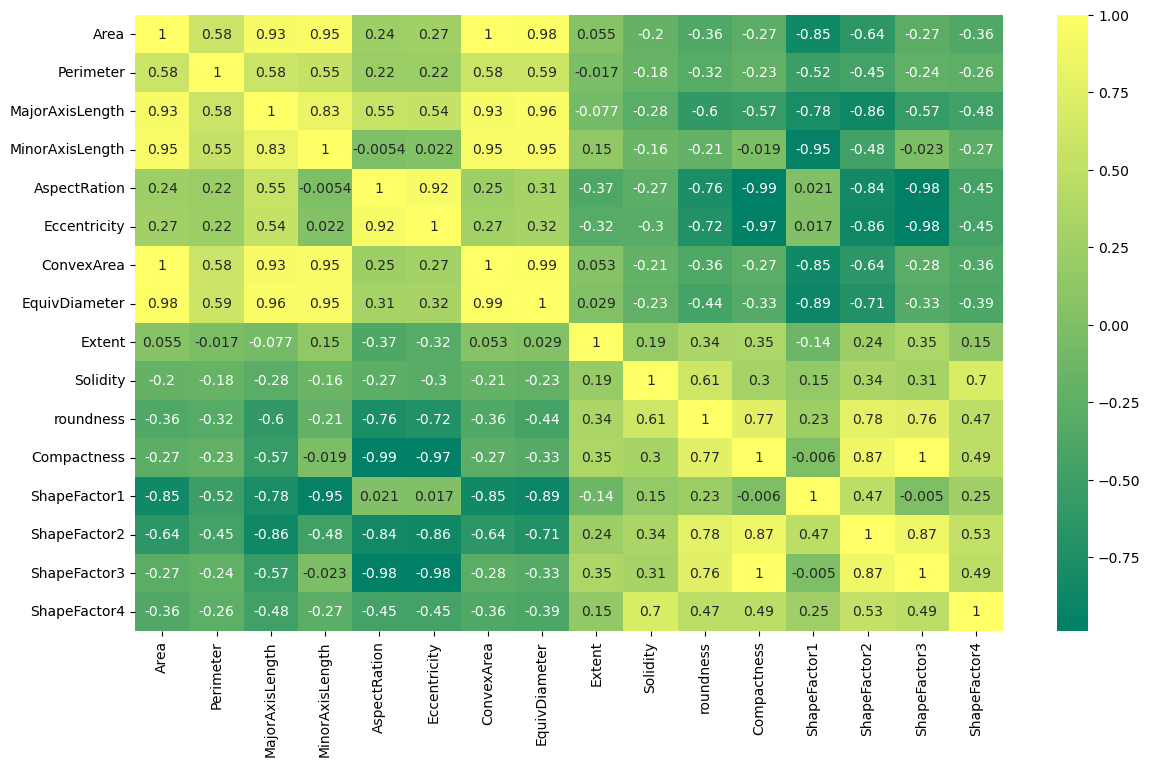

In [14]:
plt.figure(figsize = (14,8))
sns.heatmap(data.corr(), annot = True , cmap = 'summer')

In [15]:
X = data.drop(columns = 'Class')
Y = data[['Class']]

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.02, random_state = 48)

In [54]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (13272, 16)
Training Labels Shape :  (13272, 1)
Testing Data Shape    :  (271, 16)
Testing Labels Shape  :  (271, 1)


In [55]:
x_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
5675,43717,819231.00,330.960398,169.310775,1.954751,0.859239,44186,235.928407,0.830569,0.989386,0.818554,0.712860,0.007571,0.001206,0.508169,0.993344
9149,46399,804141.00,303.388780,195.734698,1.550000,0.764046,46960,243.057692,0.817719,0.988054,0.901683,0.801143,0.006539,0.001662,0.641830,0.994836
8690,44355,789387.00,300.714314,188.435193,1.595850,0.779321,44840,237.643725,0.811115,0.989184,0.894484,0.790264,0.006780,0.001631,0.624517,0.996636
5182,83018,1118.78,444.735947,240.211608,1.851434,0.841587,84398,325.118133,0.740307,0.983649,0.833475,0.731036,0.005357,0.000944,0.534414,0.989432
13556,41541,761157.00,284.923463,186.176712,1.530393,0.756989,41998,229.981834,0.710540,0.989119,0.901028,0.807171,0.006859,0.001796,0.651524,0.997088


In [56]:
y_train.head()

,Class
5675,HOROZ
9149,SIRA
8690,SIRA
5182,CALI
13556,DERMASON


In [57]:
# Scalling
cols = ['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train[cols])

x_train[cols] = scaler.transform(x_train[cols])
x_test[cols] = scaler.transform(x_test[cols])

In [58]:
x_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
5675,0.099477,0.426143,0.265388,0.138585,0.661632,0.924641,0.096885,0.182992,0.885404,0.929847,0.656471,0.208473,0.624581,0.206966,0.173327,0.877258
9149,0.110928,0.418289,0.215733,0.216835,0.373643,0.787173,0.108320,0.200460,0.844069,0.912187,0.822375,0.463091,0.490109,0.353898,0.410133,0.905914
8690,0.102201,0.410609,0.210916,0.195219,0.406266,0.809231,0.099581,0.187195,0.822826,0.927169,0.808007,0.431716,0.521520,0.344082,0.379461,0.940504
5182,0.267289,0.000294,0.470294,0.348546,0.588120,0.899149,0.262655,0.401524,0.595059,0.853793,0.686249,0.260896,0.336119,0.122420,0.219825,0.802094
13556,0.090185,0.395914,0.182478,0.188530,0.359692,0.776982,0.087865,0.168422,0.499309,0.926304,0.821067,0.480477,0.531833,0.397243,0.427310,0.949188


In [59]:
x_test.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
674,0.072546,0.362698,0.104264,0.221867,0.141095,0.515411,0.070308,0.139670,0.635952,0.954989,0.952178,0.758979,0.479248,0.674680,0.720017,0.986043
2154,0.155246,0.472822,0.238345,0.316982,0.250086,0.676058,0.151956,0.263710,0.655918,0.893861,0.746527,0.606913,0.363155,0.398653,0.556099,0.943159
4005,0.184072,0.503284,0.332877,0.294572,0.451711,0.836365,0.182837,0.301775,0.708875,0.763370,0.725198,0.378857,0.393769,0.227713,0.328734,0.793848
8069,0.090147,0.404143,0.209329,0.160618,0.477778,0.850313,0.087622,0.168361,0.772288,0.941906,0.748265,0.364477,0.578811,0.314960,0.315141,0.963227
8321,0.095027,0.406042,0.203756,0.181745,0.418976,0.817212,0.092795,0.176061,0.787930,0.911270,0.779214,0.418091,0.544161,0.344776,0.366272,0.924031


In [63]:
# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
# classifier.fit(x_train, y_train)

In [64]:
# from sklearn.metrics import accuracy_score
# pred_train = classifier.predict(x_train)
# pred_test = classifier.predict(x_test)

# print('Tranning accuracy_score :',accuracy_score(y_train,pred_train))
# print('Testing accuracy_score :',accuracy_score(y_test,pred_test))

In [60]:
# Training the mode
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [61]:
from sklearn.metrics import accuracy_score
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

print('Tranning accuracy_score :',accuracy_score(y_train,pred_train))
print('Testing accuracy_score :',accuracy_score(y_test,pred_test))

Tranning accuracy_score : 1.0
Testing accuracy_score : 0.9298892988929889


In [62]:
from sklearn.metrics import f1_score

print('Tranning accuracy_score :',f1_score(y_train,pred_train, average='weighted'))
print('Testing accuracy_score :',f1_score(y_test,pred_test, average='weighted'))

Tranning accuracy_score : 1.0
Testing accuracy_score : 0.9301177867634562


In [72]:
from imblearn.under_sampling import NearMiss
nearmiss_samler = NearMiss()
x_resampled, y_resampled = nearmiss_samler.fit_resample(X, Y)

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.02, random_state = 48)

In [74]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (3580, 16)
Training Labels Shape :  (3580, 1)
Testing Data Shape    :  (74, 16)
Testing Labels Shape  :  (74, 1)


In [75]:
# Training the mode
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [76]:
from sklearn.metrics import accuracy_score
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

print('Tranning accuracy_score :',accuracy_score(y_train,pred_train))
print('Testing accuracy_score :',accuracy_score(y_test,pred_test))

Tranning accuracy_score : 1.0
Testing accuracy_score : 0.9459459459459459
